In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('transjakarta_clean.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,duration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,39.466667


Coba menghitung kepadatan melalui waktunya

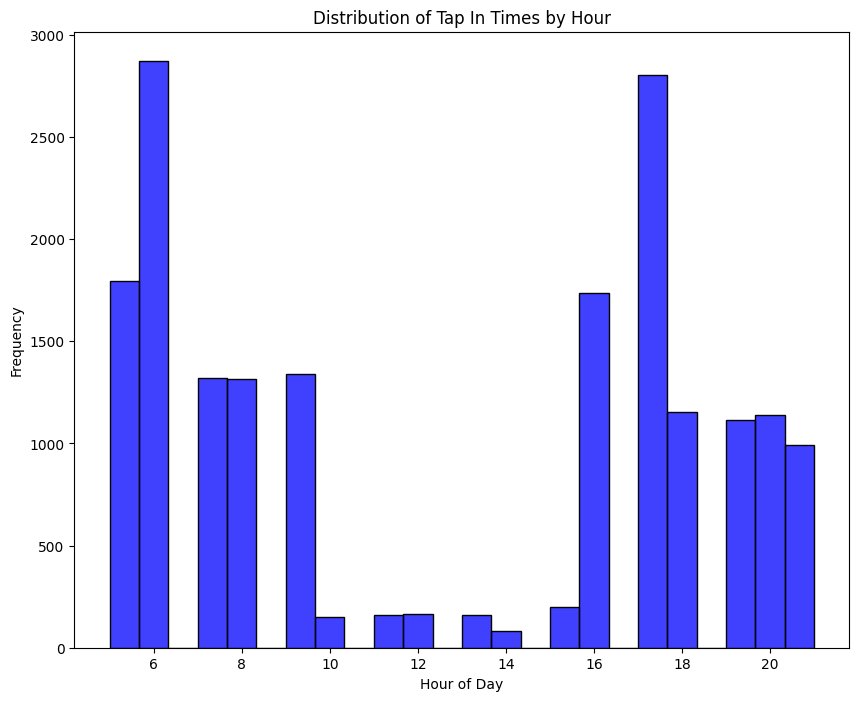

In [12]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

df['tapInHour'] = df['tapInTime'].dt.hour

plt.figure(figsize=(10, 8))

plt.title('Distribution of Tap In Times by Hour')
sns.histplot(df['tapInHour'], bins=24, kde=False, color='blue')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

Hitung kepadatan berdasarkan koridornya

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30320\4016273507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_corridors.index, y=top_5_corridors.values, palette='viridis')


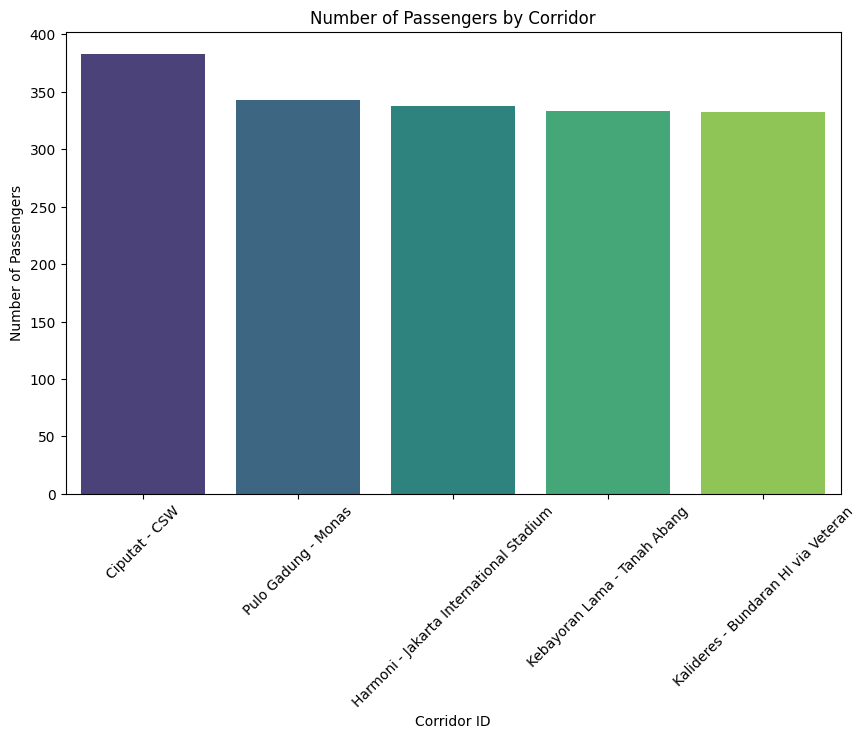

In [33]:
corridor_counts = df.groupby('corridorName').size().sort_values(ascending=False)

top_5_corridors = corridor_counts.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_corridors.index, y=top_5_corridors.values, palette='viridis')

plt.title('Number of Passengers by Corridor')
plt.xlabel('Corridor ID')
plt.ylabel('Number of Passengers')

plt.xticks(rotation=45)

plt.show()